# Model Tuning

This notebook will demonstate how to automatically tune model hyperparameters for prediction accuracy.

## Set-Up
We will begin with some imports and then generate some training data using the simple cart-pole benchmark.

In [2]:
import os
os.chdir('/home/baoyu/baoyul2/autompc')

In [3]:
import autompc as ampc
import numpy as np

from autompc.benchmarks import CartpoleSwingupBenchmark

benchmark = CartpoleSwingupBenchmark()

system = benchmark.system
trajs = benchmark.gen_trajs(seed=100, n_trajs=100, traj_len=200)

Loading AutoMPC...


/home/baoyu/anaconda3/envs/autompc/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Finished loading AutoMPC


## Auto-Tuning

By default, AutoMPC's `ModelTuner` will auto-select from all available models to fit the trajectories as best as possible. The tuner by default will run for 10 iterations, but for real problems you will want to run for many, many more iterations (100s).

In [4]:
from autompc.tuning import ModelTuner

tuner = ModelTuner(system,trajs,verbose=1)
print("Selecting from models",",".join(model.name for model in tuner.model.models))
tuned_model,tune_result = tuner.run(n_iters=10)

print("Selected model:",tuned_model.name)
print("Final cross-validated RMSE score:",tune_result.inc_costs[-1])

/home/baoyu/anaconda3/envs/autompc/lib/python3.9/site-packages/smac/intensification/parallel_scheduling.py:154: UserWarning: Hyperband is executed with 1 workers only. Consider to use pynisher to use all available workers.
  warnings.warn(


Cuda is used for GPytorch
Selecting from models MLP,ARX,Koopman,SINDy,ApproximateGPModel
Evaluating Cfg:
Configuration(values={
  'MLP:batchnorm': False,
  'MLP:hidden_size_1': 65,
  'MLP:hidden_size_2': 122,
  'MLP:lr': 0.08618602295315644,
  'MLP:n_hidden_layers': '2',
  'MLP:nonlintype': 'tanh',
  'model': 'MLP',
})

Seed 0 budget 20.0
100%|██████████| 200/200 [00:47<00:00,  4.19it/s]
Model Score  0.41327386458950954
Evaluating Cfg:
Configuration(values={
  'SINDy:poly_basis': 'false',
  'SINDy:poly_cross_terms': 'false',
  'SINDy:threshold': 0.0005912553752448104,
  'SINDy:time_mode': 'discrete',
  'SINDy:trig_basis': 'false',
  'model': 'SINDy',
})

Seed 0 budget 20.0
Model Score  0.40385144167952897
Evaluating Cfg:
Configuration(values={
  'Koopman:method': 'lstsq',
  'Koopman:poly_basis': 'false',
  'Koopman:trig_basis': 'true',
  'Koopman:trig_freq': 2,
  'Koopman:trig_interaction': 'false',
  'model': 'Koopman',
})

Seed 0 budget 20.0
Model Score  0.29217271856416444
Evaluatin

100%|██████████| 20/20 [00:04<00:00,  4.05it/s]


Model Score  0.8969682048958818
Evaluating Cfg:
Configuration(values={
  'ARX:history': 6,
  'model': 'ARX',
})

Seed 0 budget 20.0
Model Score  0.31518685709294053
Evaluating Cfg:
Configuration(values={
  'ARX:history': 5,
  'model': 'ARX',
})

Seed 0 budget 20.0
Model Score  0.3186237635264062
Evaluating Cfg:
Configuration(values={
  'ARX:history': 1,
  'model': 'ARX',
})

Seed 0 budget 20.0
Model Score  0.4038456953831064
Evaluating Cfg:
Configuration(values={
  'Koopman:method': 'lstsq',
  'Koopman:poly_basis': 'false',
  'Koopman:trig_basis': 'false',
  'model': 'Koopman',
})

Seed 0 budget 20.0
Model Score  0.40385144167952897
Evaluating Cfg:
Configuration(values={
  'Koopman:method': 'lstsq',
  'Koopman:poly_basis': 'false',
  'Koopman:trig_basis': 'true',
  'Koopman:trig_freq': 2,
  'Koopman:trig_interaction': 'false',
  'model': 'Koopman',
})

Seed 0 budget 60.0
Model Score  0.29217271856416444
Selected model: Koopman
Final cross-validated RMSE score: 0.29217271856416444


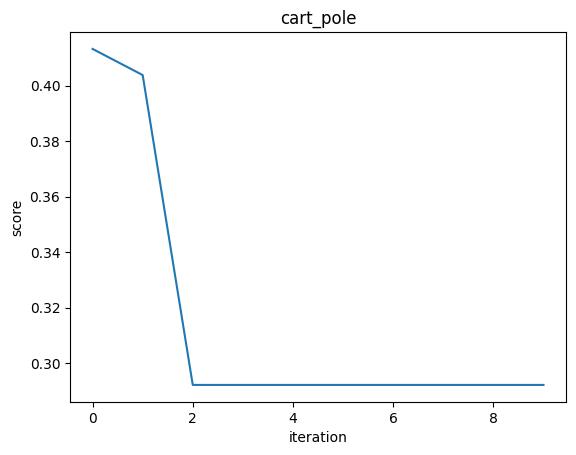

In [5]:
import matplotlib.pyplot as plt
name = 'cart_pole'
plt.plot(tune_result.inc_costs)
plt.title(name)
plt.ylabel('score')
plt.xlabel('iteration')
plt.show()
plt.close()

In [4]:
from autompc.tuning import ModelTuner

tuner = ModelTuner(system,trajs,verbose=1, multi_fidelity=False)
print("Selecting from models",",".join(model.name for model in tuner.model.models))
tuned_model,tune_result = tuner.run(n_iters=10)

print("Selected model:",tuned_model.name)
print("Final cross-validated RMSE score:",tune_result.inc_costs[-1])

Cuda is used for GPytorch
Selecting from models MLP,ARX,Koopman,SINDy,ApproximateGPModel
Evaluating Cfg:
Configuration(values={
  'MLP:batchnorm': False,
  'MLP:hidden_size_1': 128,
  'MLP:hidden_size_2': 128,
  'MLP:lr': 0.001,
  'MLP:n_hidden_layers': '2',
  'MLP:nonlintype': 'relu',
  'model': 'MLP',
})

Seed 0 budget 0.0
100%|██████████| 200/200 [01:51<00:00,  1.79it/s]
Model Score  0.013180594854906129
Evaluating Cfg:
Configuration(values={
  'SINDy:poly_basis': 'true',
  'SINDy:poly_cross_terms': 'false',
  'SINDy:poly_degree': 4,
  'SINDy:threshold': 0.04301113125880565,
  'SINDy:time_mode': 'continuous',
  'SINDy:trig_basis': 'false',
  'model': 'SINDy',
})

Seed 0 budget 0.0
Model Score  0.4855330791907131
Evaluating Cfg:
Configuration(values={
  'ApproximateGPModel:induce_count': 189,
  'ApproximateGPModel:learning_rate': 3.1207419288750797,
  'model': 'ApproximateGPModel',
})

Seed 0 budget 0.0


100%|██████████| 20/20 [00:10<00:00,  1.84it/s]


Model Score  1.0079373196182593
Evaluating Cfg:
Configuration(values={
  'ApproximateGPModel:induce_count': 195,
  'ApproximateGPModel:learning_rate': 4.864161560364612,
  'model': 'ApproximateGPModel',
})

Seed 0 budget 0.0


100%|██████████| 20/20 [00:12<00:00,  1.61it/s]


Model Score  0.9956832835872325
Evaluating Cfg:
Configuration(values={
  'SINDy:poly_basis': 'false',
  'SINDy:poly_cross_terms': 'false',
  'SINDy:threshold': 0.0055037450720138836,
  'SINDy:time_mode': 'discrete',
  'SINDy:trig_basis': 'false',
  'model': 'SINDy',
})

Seed 0 budget 0.0
Model Score  0.4058850993524265
Evaluating Cfg:
Configuration(values={
  'MLP:batchnorm': True,
  'MLP:hidden_size_1': 152,
  'MLP:hidden_size_2': 155,
  'MLP:hidden_size_3': 123,
  'MLP:lr': 0.00011873256559387793,
  'MLP:n_hidden_layers': '3',
  'MLP:nonlintype': 'tanh',
  'model': 'MLP',
})

Seed 0 budget 0.0
100%|██████████| 200/200 [01:38<00:00,  2.03it/s]
Model Score  0.09485626395422946
Evaluating Cfg:
Configuration(values={
  'ApproximateGPModel:induce_count': 89,
  'ApproximateGPModel:learning_rate': 6.067470256721674,
  'model': 'ApproximateGPModel',
})

Seed 0 budget 0.0


100%|██████████| 20/20 [00:06<00:00,  3.25it/s]


Model Score  1.0880534058486317
Evaluating Cfg:
Configuration(values={
  'SINDy:poly_basis': 'false',
  'SINDy:poly_cross_terms': 'false',
  'SINDy:threshold': 0.004085674216216342,
  'SINDy:time_mode': 'discrete',
  'SINDy:trig_basis': 'true',
  'SINDy:trig_freq': 2,
  'SINDy:trig_interaction': 'false',
  'model': 'SINDy',
})

Seed 0 budget 0.0
Model Score  0.29210114892118405
Evaluating Cfg:
Configuration(values={
  'MLP:batchnorm': False,
  'MLP:hidden_size_1': 201,
  'MLP:lr': 9.121546699225478e-05,
  'MLP:n_hidden_layers': '1',
  'MLP:nonlintype': 'tanh',
  'model': 'MLP',
})

Seed 0 budget 0.0
100%|██████████| 200/200 [00:47<00:00,  4.18it/s]
Model Score  0.15755677478230057
Evaluating Cfg:
Configuration(values={
  'MLP:batchnorm': True,
  'MLP:hidden_size_1': 256,
  'MLP:hidden_size_2': 178,
  'MLP:lr': 0.0006101442487744233,
  'MLP:n_hidden_layers': '2',
  'MLP:nonlintype': 'tanh',
  'model': 'MLP',
})

Seed 0 budget 0.0
100%|██████████| 200/200 [01:27<00:00,  2.27it/s]
Model S

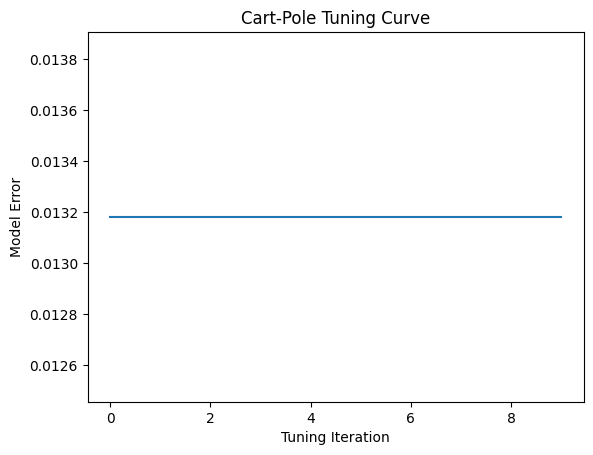

In [5]:
%matplotlib inline

from autompc.graphs import plot_tuning_curve,plot_tuning_correlations
import matplotlib.pyplot as plt

plot_tuning_curve(tune_result)
plt.title("Cart-Pole Tuning Curve")
plt.show()

You can customize the behavior of tuning by specifying which evaluation strategy we wish to use.  Possible options include splitting method (holdout vs cross-validation), which horizon to measure predictions upon, and what scoring metric to use.  By default, ModelTuner uses 3-fold cross-validation and one-step RMSE.

Here's an example of customizing the evaluator to use with 10\% holdout and the RMSE metric with a 5-step prediction horizon.

In [ ]:
tuner = ModelTuner(system,trajs,eval_holdout=0.1,eval_folds=1,eval_metric='rmse',eval_horizon=5)

To customize behavior even further, we can use a `ModelEvaluator` class, which has various subclasses.  As an example, the HoldoutModelEvaluator is specified here.  The `evaluator` keyword to ModelTuner will specify an evaluator that overrides the default keyword arguments.

In [ ]:
from autompc.tuning import HoldoutModelEvaluator

evaluator = HoldoutModelEvaluator(trajs, metric="rmse", holdout_prop=0.1,
                                  rng=np.random.default_rng(100), horizon=20)
tuner = ModelTuner(system,trajs,evaluator=evaluator)

## Specifying the Model Class

In some cases we know which model class we wish to tune, and ModelTuner can also accept a specified class.  For example, we can consider the MLP model. Here we'll perform a much longer tuning run, so let this run for a few hours...

**Alternatively, you can save/load the tuning data from a prior run by setting `dump=False` in the following cell, and skipping the tuning altogether.**

In [6]:
from autompc.sysid import MLP

tuner = ModelTuner(system,trajs,MLP(system),verbose=True)
tuned_model, tune_result = tuner.run(n_iters=200,rng=np.random.default_rng(200))

Evaluating Cfg:
Configuration(values={
  'batchnorm': True,
  'hidden_size_1': 139,
  'hidden_size_2': 45,
  'hidden_size_3': 144,
  'hidden_size_4': 157,
  'lr': 0.8623711201077358,
  'n_hidden_layers': '4',
  'nonlintype': 'sigmoid',
})

Seed 0 budget 26.666666666666664
 58%|█████▊    | 29/50 [00:27<00:19,  1.07it/s]
Model Score  0.4999674869128788
Evaluating Cfg:
Configuration(values={
  'batchnorm': True,
  'hidden_size_1': 154,
  'lr': 0.0034362659301490936,
  'n_hidden_layers': '1',
  'nonlintype': 'sigmoid',
})

Seed 0 budget 26.666666666666664
100%|██████████| 50/50 [00:17<00:00,  2.84it/s]
Model Score  0.19342271016755427
Evaluating Cfg:
Configuration(values={
  'batchnorm': False,
  'hidden_size_1': 90,
  'hidden_size_2': 211,
  'hidden_size_3': 164,
  'hidden_size_4': 46,
  'lr': 0.002076786155440802,
  'n_hidden_layers': '4',
  'nonlintype': 'tanh',
})

Seed 0 budget 26.666666666666664
 98%|█████████▊| 49/50 [00:26<00:00,  1.82it/s]
Model Score  0.05852910960391211
Evaluati

100%|██████████| 50/50 [00:36<00:00,  1.37it/s]
Model Score  0.08493548841855432
Evaluating Cfg:
Configuration(values={
  'batchnorm': False,
  'hidden_size_1': 53,
  'hidden_size_2': 35,
  'lr': 0.2621791809636283,
  'n_hidden_layers': '2',
  'nonlintype': 'selu',
})

Seed 0 budget 26.666666666666664
100%|██████████| 50/50 [00:12<00:00,  3.92it/s]
Model Score  1.0755106728279358
Evaluating Cfg:
Configuration(values={
  'batchnorm': False,
  'hidden_size_1': 33,
  'hidden_size_2': 62,
  'lr': 0.12612687374651146,
  'n_hidden_layers': '2',
  'nonlintype': 'tanh',
})

Seed 0 budget 26.666666666666664
100%|██████████| 50/50 [00:13<00:00,  3.76it/s]
Model Score  0.39994240853823265
Evaluating Cfg:
Configuration(values={
  'batchnorm': True,
  'hidden_size_1': 116,
  'lr': 0.9672332804241323,
  'n_hidden_layers': '1',
  'nonlintype': 'sigmoid',
})

Seed 0 budget 26.666666666666664
100%|██████████| 50/50 [00:16<00:00,  3.04it/s]
Model Score  0.5218676680897026
Evaluating Cfg:
Configuration(v

100%|██████████| 50/50 [00:12<00:00,  4.11it/s]
Model Score  0.42291476199004796
Evaluating Cfg:
Configuration(values={
  'batchnorm': False,
  'hidden_size_1': 255,
  'hidden_size_2': 47,
  'hidden_size_3': 232,
  'hidden_size_4': 161,
  'lr': 0.5952616729125805,
  'n_hidden_layers': '4',
  'nonlintype': 'tanh',
})

Seed 0 budget 26.666666666666664
 96%|█████████▌| 48/50 [00:26<00:01,  1.79it/s]
Model Score  12.491021578732154
Evaluating Cfg:
Configuration(values={
  'batchnorm': False,
  'hidden_size_1': 216,
  'hidden_size_2': 111,
  'hidden_size_3': 35,
  'hidden_size_4': 205,
  'lr': 0.09175833771591517,
  'n_hidden_layers': '4',
  'nonlintype': 'sigmoid',
})

Seed 0 budget 26.666666666666664
100%|██████████| 50/50 [00:22<00:00,  2.18it/s]
Model Score  0.8651817501068441
Evaluating Cfg:
Configuration(values={
  'batchnorm': True,
  'hidden_size_1': 77,
  'hidden_size_2': 136,
  'lr': 0.03597957600887369,
  'n_hidden_layers': '2',
  'nonlintype': 'tanh',
})

Seed 0 budget 26.666666

100%|██████████| 50/50 [00:19<00:00,  2.53it/s]
Model Score  0.26343058128790464
Evaluating Cfg:
Configuration(values={
  'batchnorm': True,
  'hidden_size_1': 192,
  'hidden_size_2': 211,
  'hidden_size_3': 188,
  'hidden_size_4': 245,
  'lr': 0.00012287837313502793,
  'n_hidden_layers': '4',
  'nonlintype': 'tanh',
})

Seed 0 budget 26.666666666666664
 20%|██        | 10/50 [00:28<01:52,  2.82s/it]
Model Score  0.191357479009699
Evaluating Cfg:
Configuration(values={
  'batchnorm': True,
  'hidden_size_1': 159,
  'hidden_size_2': 159,
  'hidden_size_3': 98,
  'hidden_size_4': 54,
  'lr': 0.0014047671540952024,
  'n_hidden_layers': '4',
  'nonlintype': 'tanh',
})

Seed 0 budget 26.666666666666664
 54%|█████▍    | 27/50 [00:26<00:22,  1.00it/s]
Model Score  0.13800043274840587
Evaluating Cfg:
Configuration(values={
  'batchnorm': False,
  'hidden_size_1': 236,
  'hidden_size_2': 103,
  'lr': 0.00014868571931398751,
  'n_hidden_layers': '2',
  'nonlintype': 'tanh',
})

Seed 0 budget 26.

100%|██████████| 50/50 [00:22<00:00,  2.21it/s]
Model Score  0.4244140525676432
Evaluating Cfg:
Configuration(values={
  'batchnorm': False,
  'hidden_size_1': 242,
  'hidden_size_2': 71,
  'hidden_size_3': 85,
  'lr': 0.00047848668576726554,
  'n_hidden_layers': '3',
  'nonlintype': 'tanh',
})

Seed 0 budget 26.666666666666664
100%|██████████| 50/50 [00:18<00:00,  2.66it/s]
Model Score  0.026267665210475567
Evaluating Cfg:
Configuration(values={
  'batchnorm': True,
  'hidden_size_1': 231,
  'hidden_size_2': 84,
  'lr': 3.010007036524472e-05,
  'n_hidden_layers': '2',
  'nonlintype': 'tanh',
})

Seed 0 budget 26.666666666666664
 80%|████████  | 40/50 [00:27<00:06,  1.48it/s]
Model Score  0.27514746359153835
Evaluating Cfg:
Configuration(values={
  'batchnorm': False,
  'hidden_size_1': 226,
  'hidden_size_2': 31,
  'lr': 0.00017137685387679617,
  'n_hidden_layers': '2',
  'nonlintype': 'tanh',
})

Seed 0 budget 26.666666666666664
100%|██████████| 50/50 [00:15<00:00,  3.22it/s]
Model S

100%|██████████| 50/50 [00:16<00:00,  2.96it/s]
Model Score  0.07049380765230034
Evaluating Cfg:
Configuration(values={
  'batchnorm': True,
  'hidden_size_1': 212,
  'hidden_size_2': 149,
  'lr': 0.0005852981891178396,
  'n_hidden_layers': '2',
  'nonlintype': 'tanh',
})

Seed 0 budget 26.666666666666664
 74%|███████▍  | 37/50 [00:27<00:09,  1.35it/s]
Model Score  0.1400511108377163
Evaluating Cfg:
Configuration(values={
  'batchnorm': True,
  'hidden_size_1': 213,
  'hidden_size_2': 157,
  'lr': 0.0005969977834332687,
  'n_hidden_layers': '2',
  'nonlintype': 'tanh',
})

Seed 0 budget 26.666666666666664
 74%|███████▍  | 37/50 [00:27<00:09,  1.35it/s]
Model Score  0.1325942675219343
Evaluating Cfg:
Configuration(values={
  'batchnorm': False,
  'hidden_size_1': 249,
  'hidden_size_2': 197,
  'hidden_size_3': 75,
  'hidden_size_4': 102,
  'lr': 0.005517866165179922,
  'n_hidden_layers': '4',
  'nonlintype': 'selu',
})

Seed 0 budget 26.666666666666664
 94%|█████████▍| 47/50 [00:27<00:0

100%|██████████| 50/50 [00:18<00:00,  2.63it/s]
Model Score  0.04782605135551123
Evaluating Cfg:
Configuration(values={
  'batchnorm': False,
  'hidden_size_1': 214,
  'hidden_size_2': 156,
  'lr': 0.0006045073205699702,
  'n_hidden_layers': '2',
  'nonlintype': 'tanh',
})

Seed 0 budget 26.666666666666664
100%|██████████| 50/50 [00:18<00:00,  2.66it/s]
Model Score  0.01913421406773941
Evaluating Cfg:
Configuration(values={
  'batchnorm': True,
  'hidden_size_1': 172,
  'hidden_size_2': 234,
  'hidden_size_3': 234,
  'hidden_size_4': 109,
  'lr': 0.016298353028466793,
  'n_hidden_layers': '4',
  'nonlintype': 'selu',
})

Seed 0 budget 26.666666666666664
 38%|███▊      | 19/50 [00:26<00:43,  1.41s/it]
Model Score  0.13601924726160555
Evaluating Cfg:
Configuration(values={
  'batchnorm': False,
  'hidden_size_1': 213,
  'hidden_size_2': 156,
  'lr': 0.000606760243871033,
  'n_hidden_layers': '2',
  'nonlintype': 'tanh',
})

Seed 0 budget 26.666666666666664
100%|██████████| 50/50 [00:19<0

Evaluating Cfg:
Configuration(values={
  'batchnorm': False,
  'hidden_size_1': 228,
  'hidden_size_2': 156,
  'lr': 0.0006580087616945574,
  'n_hidden_layers': '2',
  'nonlintype': 'tanh',
})

Seed 0 budget 26.666666666666664
100%|██████████| 50/50 [00:18<00:00,  2.76it/s]
Model Score  0.02002273290297685
Evaluating Cfg:
Configuration(values={
  'batchnorm': True,
  'hidden_size_1': 111,
  'hidden_size_2': 62,
  'hidden_size_3': 249,
  'lr': 1.1358682460070505e-05,
  'n_hidden_layers': '3',
  'nonlintype': 'selu',
})

Seed 0 budget 26.666666666666664
 74%|███████▍  | 37/50 [00:27<00:09,  1.37it/s]
Model Score  0.3636873588585316
Evaluating Cfg:
Configuration(values={
  'batchnorm': False,
  'hidden_size_1': 225,
  'hidden_size_2': 157,
  'hidden_size_3': 136,
  'hidden_size_4': 138,
  'lr': 0.0006045073205699702,
  'n_hidden_layers': '4',
  'nonlintype': 'tanh',
})

Seed 0 budget 26.666666666666664
 98%|█████████▊| 49/50 [00:26<00:00,  1.83it/s]
Model Score  0.03903203144952718
Evalua

100%|██████████| 50/50 [00:23<00:00,  2.12it/s]
Model Score  0.022447748608579593
Evaluating Cfg:
Configuration(values={
  'batchnorm': False,
  'hidden_size_1': 220,
  'hidden_size_2': 156,
  'lr': 1.4046555935712664e-05,
  'n_hidden_layers': '2',
  'nonlintype': 'tanh',
})

Seed 0 budget 26.666666666666664
100%|██████████| 50/50 [00:18<00:00,  2.70it/s]
Model Score  0.3920092416612651
Evaluating Cfg:
Configuration(values={
  'batchnorm': False,
  'hidden_size_1': 220,
  'hidden_size_2': 155,
  'lr': 0.0006045073205699702,
  'n_hidden_layers': '2',
  'nonlintype': 'tanh',
})

Seed 0 budget 80.0
100%|██████████| 50/50 [00:18<00:00,  2.66it/s]
Model Score  0.01774080050042472
Evaluating Cfg:
Configuration(values={
  'batchnorm': False,
  'hidden_size_1': 220,
  'hidden_size_2': 155,
  'lr': 0.0006045073205699702,
  'n_hidden_layers': '2',
  'nonlintype': 'tanh',
})

Seed 0 budget 240.0
100%|██████████| 50/50 [00:19<00:00,  2.52it/s]
Model Score  0.01774080050042472
Evaluating Cfg:
Confi

100%|██████████| 50/50 [00:18<00:00,  2.67it/s]
Model Score  0.02094151534729452
Evaluating Cfg:
Configuration(values={
  'batchnorm': False,
  'hidden_size_1': 222,
  'hidden_size_2': 155,
  'lr': 0.0005949450820650708,
  'n_hidden_layers': '2',
  'nonlintype': 'tanh',
})

Seed 0 budget 240.0
100%|██████████| 50/50 [00:19<00:00,  2.53it/s]
Model Score  0.02094151534729452
Evaluating Cfg:
Configuration(values={
  'batchnorm': False,
  'hidden_size_1': 34,
  'hidden_size_2': 94,
  'hidden_size_3': 53,
  'lr': 0.00034167954262384484,
  'n_hidden_layers': '3',
  'nonlintype': 'sigmoid',
})

Seed 0 budget 80.0
100%|██████████| 50/50 [00:14<00:00,  3.49it/s]
Model Score  0.4024338960781484
Evaluating Cfg:
Configuration(values={
  'batchnorm': False,
  'hidden_size_1': 220,
  'hidden_size_2': 154,
  'hidden_size_3': 31,
  'lr': 0.0006039974583010989,
  'n_hidden_layers': '3',
  'nonlintype': 'tanh',
})

Seed 0 budget 80.0
100%|██████████| 50/50 [00:21<00:00,  2.35it/s]
Model Score  0.0254448

100%|██████████| 50/50 [00:18<00:00,  2.67it/s]
Model Score  0.01773208371519041
Evaluating Cfg:
Configuration(values={
  'batchnorm': False,
  'hidden_size_1': 220,
  'hidden_size_2': 155,
  'hidden_size_3': 164,
  'lr': 0.0006039974583010989,
  'n_hidden_layers': '3',
  'nonlintype': 'tanh',
})

Seed 0 budget 80.0
100%|██████████| 50/50 [00:23<00:00,  2.14it/s]
Model Score  0.021727523129800915
Evaluating Cfg:
Configuration(values={
  'batchnorm': True,
  'hidden_size_1': 89,
  'hidden_size_2': 48,
  'hidden_size_3': 209,
  'hidden_size_4': 114,
  'lr': 0.45675274898341706,
  'n_hidden_layers': '4',
  'nonlintype': 'selu',
})

Seed 0 budget 80.0
100%|██████████| 50/50 [00:44<00:00,  1.12it/s]
Model Score  4.9696498530826165
Evaluating Cfg:
Configuration(values={
  'batchnorm': False,
  'hidden_size_1': 220,
  'hidden_size_2': 155,
  'lr': 0.0006077230959271921,
  'n_hidden_layers': '2',
  'nonlintype': 'tanh',
})

Seed 0 budget 240.0
100%|██████████| 50/50 [00:19<00:00,  2.51it/s]
Mo

In [2]:
import pickle

#To dump tuning result, turn to True.  To load it, turn to False
DUMP = False
if DUMP:
    with open('tuned_mlp_model.pkl','wb') as f:
        pickle.dump(tuned_model,f)
    with open('mlp_model_tuning_result.pkl','wb') as f:
        pickle.dump(tune_result,f)
else:
    with open('tuned_mlp_model.pkl','rb') as f:
        tuned_model = pickle.load(f)
    with open('mlp_model_tuning_result.pkl','rb') as f:
        tune_result = pickle.load(f)

Let's check what configuration was selected by the tuner.

In [3]:
tune_result.inc_cfg

Configuration(values={
  'batchnorm': False,
  'hidden_size_1': 220,
  'hidden_size_2': 155,
  'lr': 0.000606990613048173,
  'n_hidden_layers': '2',
  'nonlintype': 'tanh',
})

We see that the tuner selected a 2-layer MLP with `tanh` activations. 

Before we move on, let's note that another option is to specify a set of model classes to use. To do so we can use the AutoSelectModel class as the model as follows:

In [ ]:
from autompc.sysid import SINDy
from autompc.sysid import AutoSelectModel

selector = AutoSelectModel(system,[MLP(system),SINDy(system)])
tuner = ModelTuner(system,trajs,model=selector)

## Visualizing the Results

We can now visualize the tuning results.  First, we will plot the tuning curve.  This shows the holdout set performance of the best-known model at different points over the course of the tuning process.

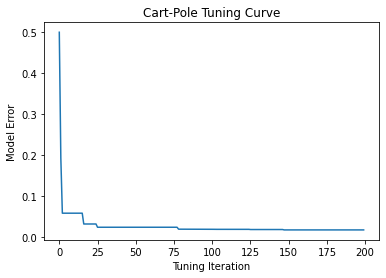

In [4]:
%matplotlib inline

from autompc.graphs import plot_tuning_curve,plot_tuning_correlations
import matplotlib.pyplot as plt

plot_tuning_curve(tune_result)
plt.title("Cart-Pole Tuning Curve")
plt.show()

To further study the tuning, we can examine how the cost correlates with various hyperparameter settings using the `plot_tuning_correlations` function.

[]

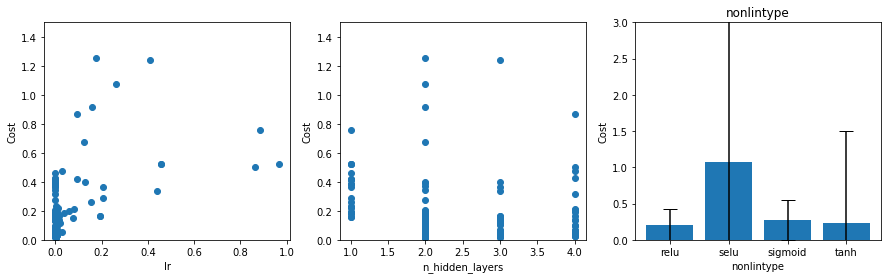

In [7]:
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(15,4))
plot_tuning_correlations(tune_result,'lr',ax=ax1)
plot_tuning_correlations(tune_result,'n_hidden_layers',ax=ax2)
plot_tuning_correlations(tune_result,'nonlintype',ax=ax3)
ax1.set_ylim(0,1.5)
ax2.set_ylim(0,1.5)
ax3.set_ylim(0,3.0)
ax3.set_title('nonlintype')
plt.plot()

Next, we can compare the performance of our tuned model to the default MLP configuration.  We will generate a fresh dataset for testing and compare over multiple prediction horizons.  For more details on how to do this comparison, see [2. Models].

100%|██████████| 50/50 [00:21<00:00,  2.30it/s]


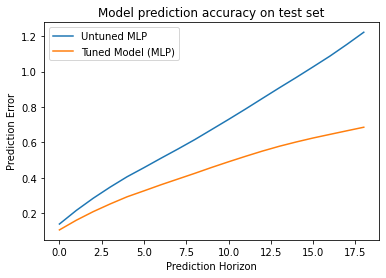

In [20]:
untuned_model = MLP(system)
untuned_model.train(trajs)

testing_set = benchmark.gen_trajs(seed=101, n_trajs=100, traj_len=200)

from autompc.graphs.kstep_graph import KstepPredAccGraph

graph = KstepPredAccGraph(system, testing_set, kmax=20, metric="rmse")
graph.add_model(untuned_model, "Untuned MLP")
graph.add_model(tuned_model, "Tuned Model (MLP)")

fig = plt.figure()
ax = fig.gca()
graph(fig, ax)
ax.set_title("Model prediction accuracy on test set")
plt.show()

As we can see, the tuned model outperforms the untuned model on the unseen dataset at all prediction horizons.

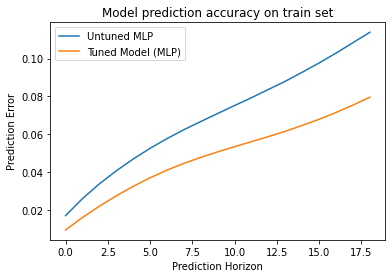

In [22]:
graph = KstepPredAccGraph(system, trajs, kmax=20, metric="rmse")
graph.add_model(untuned_model, "Untuned MLP")
graph.add_model(tuned_model, "Tuned Model (MLP)")

fig = plt.figure()
ax = fig.gca()
graph(fig, ax)
ax.set_title("Model prediction accuracy on training set")
plt.show()